Inpendent Variables:
    GDP per capita
    Human Development Index (HDI)
    Total Population
    Transparency Index

Dependent Variables:
    Total Cases per million
    Total Deaths per million
    
Other Data Columns:
    ISO Code
    Continent
    Location
    Date

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr
import gmaps
import requests
import gmaps.datasets
import ipywidgets as widgets
import seaborn as sns; sns.set(style='white')
import gmaps.geojson_geometries

In [2]:
from configMarc import g_key
gmaps.configure(api_key=g_key)

In [3]:
# Study data files
owidCovidData = "Resources/owid-covid-data-20210430.csv"
transparencyData = "Resources/Transparency Index.csv"

CovidData = pd.read_csv(owidCovidData)
Transparency = pd.read_csv(transparencyData)

In [6]:
CovidData

iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1          AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2          AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3          AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4          AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   
...        ...       ...          ...         ...          ...        ...   
85575      ZWE    Africa     Zimbabwe  2021-04-28      38191.0       27.0   
85576      ZWE    Africa     Zimbabwe  2021-04-29      38235.0       44.0   
85577      ZWE    Africa     Zimbabwe  2021-04-30      38257.0       22.0   
85578      ZWE    Africa     Zimbabwe  2021-05-01      38260.0        3.0   
85579      ZWE    Africa     Zimbabwe  2021-05-02      38281.0       21.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                     NaN           NaN         NaN                  NaN  ...   
1                     NaN           NaN         NaN                  NaN  ...   
2                     NaN           NaN         NaN                  NaN  ...   
3                     NaN           NaN         NaN                  NaN  ...   
4                     NaN           NaN         NaN                  NaN  ...   
...                   ...           ...         ...                  ...  ...   
85575              30.143        1565.0         0.0                1.429  ...   
85576              31.000        1567.0         2.0                1.714  ...   
85577              30.286        1567.0         0.0                1.571  ...   
85578              28.000        1568.0         1.0                1.714  ...   
85579              27.857        1570.0         2.0                1.857  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0            1803.987              NaN                597.029   
1            1803.987              NaN                597.029   
2            1803.987              NaN                597.029   
3            1803.987              NaN                597.029   
4            1803.987              NaN                597.029   
...               ...              ...                    ...   
85575        1899.775             21.4                307.846   
85576        1899.775             21.4                307.846   
85577        1899.775             21.4                307.846   
85578        1899.775             21.4                307.846   
85579        1899.775             21.4                307.846   

       diabetes_prevalence  female_smokers  male_smokers  \
0                     9.59             NaN           NaN   
1                     9.59             NaN           NaN   
2                     9.59             NaN           NaN   
3                     9.59             NaN           NaN   
4                     9.59             NaN           NaN   
...                    ...             ...           ...   
85575                 1.82             1.6          30.7   
85576                 1.82             1.6          30.7   
85577                 1.82             1.6          30.7   
85578                 1.82             1.6          30.7   
85579                 1.82             1.6          30.7   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                      37.746                         0.5            64.83   
1                      37.746                         0.5            64.83   
2                      37.746                         0.5            64.83   
3                      37.746                         0.5            64.83   
4                      37.746                         0.5            64.83   
...                       ...                         ...              ...   
85575                  36.791                         1.7   

In [11]:
# eliminate extra columns
CovidClean = CovidData.copy()


# limit to max date
CovidClean = CovidClean[CovidClean['location'].isin(['Canada', 'Mexico', 'United States'])]


# rename "Location" to "Country"
CovidClean.rename(columns={"location":"Country"}, inplace=True)

# rename everything else for ease
CovidClean.rename(columns={"total_cases_per_million":"Cases", "total_deaths_per_million": "Deaths", "population": "Population", 
                           "population_density": "Density","gdp_per_capita": "GDP", "human_development_index": "HDI"}, inplace=True)

# merge with Transparency (inner join)
CovidNoAm= pd.merge(CovidClean, Transparency, on=["Country"], how="inner")
CovidNoAm.drop(['Rank'], axis = 1, inplace = True)

CovidNoAm
CovidNoAm.to_csv("Resources/CovidDataCMU.csv", index = False)


In [12]:
CovidNoAm

iso_code      continent        Country        date  total_cases  \
0         CAN  North America         Canada  2020-01-26          1.0   
1         CAN  North America         Canada  2020-01-27          1.0   
2         CAN  North America         Canada  2020-01-28          2.0   
3         CAN  North America         Canada  2020-01-29          2.0   
4         CAN  North America         Canada  2020-01-30          2.0   
...       ...            ...            ...         ...          ...   
1413      USA  North America  United States  2021-04-28   32230850.0   
1414      USA  North America  United States  2021-04-29   32289049.0   
1415      USA  North America  United States  2021-04-30   32346971.0   
1416      USA  North America  United States  2021-05-01   32392274.0   
1417      USA  North America  United States  2021-05-02   32421641.0   

      new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0           1.0                 NaN           NaN         NaN   
1           0.0                 NaN           NaN         NaN   
2           1.0                 NaN           NaN         NaN   
3           0.0                 NaN           NaN         NaN   
4           0.0                 NaN           NaN         NaN   
...         ...                 ...           ...         ...   
1413    55125.0           52679.429      574436.0       959.0   
1414    58199.0           51385.429      575290.0       854.0   
1415    57922.0           50745.857      576328.0      1038.0   
1416    45303.0           49594.429      576722.0       394.0   
1417    29367.0           49209.000      577045.0       323.0   

      new_deaths_smoothed  ...  extreme_poverty  cardiovasc_death_rate  \
0                     NaN  ...              0.5                105.599   
1                     NaN  ...              0.5                105.599   
2                     NaN  ...              0.5                105.599   
3                     NaN  ...              0.5                105.599   
4                     NaN  ...              0.5                105.599   
...                   ...  ...              ...                    ...   
1413              685.571  ...              1.2                151.089   
1414              672.143  ...              1.2                151.089   
1415              711.143  ...              1.2                151.089   
1416              663.857  ...              1.2                151.089   
1417              669.429  ...              1.2                151.089   

      diabetes_prevalence  female_smokers  male_smokers  \
0                    7.37            12.0          16.6   
1                    7.37            12.0          16.6   
2                    7.37            12.0          16.6   
3                    7.37            12.0          16.6   
4                    7.37            12.0          16.6   
...                   ...             ...           ...   
1413                10.79            19.1          24.6   
1414                10.79            19.1          24.6   
1415                10.79            19.1          24.6   
1416                10.79            19.1          24.6   
1417                10.79            19.1          24.6   

      handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                        NaN                        2.50            82.43   
1                        NaN                        2.50            82.43   
2                        NaN                        2.50            82.43   
3                        NaN                        2.50            82.43   
4                        NaN                        2.50            82.43   
...                      ...                         ...              ...   
1413                     NaN                        2.77            78.86   
1414                     NaN                        2.77            78.86   
1415                     NaN                        2.77            

In [13]:
# Pair Plots as of 4/30/2021

# Use Seaborn to create a PairGrid
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'coor = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

g = sns.pairplot(CovidNoAm, corner=True)  # Set corner=True to plot only the lower triangle:
g.map_lower(corrfunc)
# plt.show()

### Playing with Maps

In [18]:
MapsFrame = CovidAll.copy()
#MapsFrame.dtypes
#MapsFrame["country"].unique()
#MapsFrame.head()

In [19]:
latlong_df = pd.read_csv("Resources/Country Coordinates.csv")
latlong_df.head()

latitude  longitude      country  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0  33.939110  67.709953  Afghanistan         NaN         NaN         NaN   
1  41.153332  20.168331      Albania         NaN         NaN         NaN   
2  28.033886   1.659626      Algeria         NaN         NaN         NaN   
3  42.546245   1.601554      Andorra         NaN         NaN         NaN   
4 -11.202692  17.873887       Angola         NaN         NaN         NaN   

   Unnamed: 6  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [20]:
#TRY TO NOT RERUN THIS AFTER THE FIRST KERNAL RE-START BECAUSE IT MAKES YOU RESTART THE KERNAL EVERY TIME!
del latlong_df["Unnamed: 3"]
del latlong_df["Unnamed: 4"]
del latlong_df["Unnamed: 5"]
del latlong_df["Unnamed: 6"]
latlong_df.head()

latitude  longitude      country
0  33.939110  67.709953  Afghanistan
1  41.153332  20.168331      Albania
2  28.033886   1.659626      Algeria
3  42.546245   1.601554      Andorra
4 -11.202692  17.873887       Angola

In [21]:
#In MapsFrame it is "Country" and in latlong_df it is "country"
latlong_df=latlong_df.rename(columns = {"country" : "Country"})
latlong_df.head()

latitude  longitude      Country
0  33.939110  67.709953  Afghanistan
1  41.153332  20.168331      Albania
2  28.033886   1.659626      Algeria
3  42.546245   1.601554      Andorra
4 -11.202692  17.873887       Angola

In [22]:
map_df=pd.merge(MapsFrame, latlong_df, on="Country", how = "inner")
map_df.tail()
#197 rows, 196 countries,  13 columns

iso_code      continent    Country        date     Cases   Deaths  \
160      VEN  South America  Venezuela  2021-04-30  6951.871   75.116   
161      VNM           Asia    Vietnam  2021-04-30    30.081    0.360   
162      YEM           Asia      Yemen  2021-04-30   211.795   41.105   
163      ZMB         Africa     Zambia  2021-04-30  4981.844   68.048   
164      ZWE         Africa   Zimbabwe  2021-04-30  2573.988  105.430   

     Population  Density        GDP    HDI  Score   latitude   longitude  
160  28435943.0   36.253  16745.022  0.711   15.0   6.423750  -66.589730  
161  97338583.0  308.127   6171.884  0.704   36.0  14.058324  108.277199  
162  29825968.0   53.508   1479.147  0.470   15.0  15.552727   48.516388  
163  18383956.0   22.995   3689.251  0.584   33.0 -13.133897   27.849332  
164  14862927.0   42.729   1899.775  0.571   24.0 -19.015438   29.154857

In [23]:
#map_df["Country"].unique()

## INDIE VARIABLES 

In [24]:
import plotly.express as px
import plotly.graph_objects as go

In [25]:
fig_GDP = px.choropleth(map_df,  # Input Pandas DataFrame
                    locations="Country",  # DataFrame column with locations
                    color="GDP",  # DataFrame column with color values
                    locationmode = 'country names', 
                    scope = 'world',
                    color_continuous_scale= "blues",
                    labels = {"GDP" : "GDP"},
                    range_color=(map_df["GDP"].min(), map_df["GDP"].max()),
                    color_continuous_midpoint=(map_df["GDP"].median())
                   )
fig_GDP.update_layout(title_text = "GDP Per Country")
fig_GDP.update_geos(projection_type="equirectangular")
fig_GDP.show() 

In [26]:
fig_HDI = px.choropleth(map_df,  # Input Pandas DataFrame
                    locations="Country",  # DataFrame column with locations
                    color="HDI",  # DataFrame column with color values
                    locationmode = 'country names', 
                    scope = 'world',
                    color_continuous_scale= "blues",
                    labels = {"HDI" : "HDI"},
                    range_color=(map_df["HDI"].min(), map_df["HDI"].max()),
                    color_continuous_midpoint=(map_df["HDI"].median())
                   )
fig_HDI.update_layout(title_text = "Human Development Index(HDI)")
fig_HDI.update_geos(projection_type="equirectangular")
fig_HDI.show() 

In [27]:
fig_CPI = px.choropleth(map_df,  # Input Pandas DataFrame
                    locations="Country",  # DataFrame column with locations
                    color="Score",  # DataFrame column with color values
                    locationmode = 'country names', 
                    scope = 'world',
                    color_continuous_scale= "blues",
                    labels = {"Score" : "Score"},
                    range_color=(map_df["Score"].min(), map_df["Score"].max()),
                    color_continuous_midpoint=(map_df["Score"].median())
                   )
fig_CPI.update_layout(title_text = "Corruptions Perception Index")
fig_CPI.update_geos(projection_type="equirectangular")
fig_CPI.show() 

In [28]:
fig_pop = px.choropleth(map_df,  # Input Pandas DataFrame
                    locations="Country",  # DataFrame column with locations
                    color="Population",  # DataFrame column with color values
                    locationmode = 'country names', 
                    scope = 'world',
                    color_continuous_scale= "blues",
                    labels = {"Population" : "Total Population"},
                    range_color=(map_df["Population"].min(), map_df["Population"].max()),
                    color_continuous_midpoint=(map_df["Population"].median())
                   )
fig_pop.update_layout(title_text = "Total Population")
fig_pop.update_geos(projection_type="equirectangular")
fig_pop.show() 

## Dependent Variables

In [29]:
fig_cases = px.choropleth(map_df,  # Input Pandas DataFrame
                    locations="Country",  # DataFrame column with locations
                    color="Cases",  # DataFrame column with color values
                    locationmode = 'country names', 
                    scope = 'world',
                    color_continuous_scale= "blues",
                    labels = {"Cases" : "Cases Per Million"},
                    range_color=(map_df["Cases"].min(), map_df["Cases"].max()),
                    color_continuous_midpoint=(map_df["Cases"].median())
                   )
fig_cases.update_layout(title_text = "COVID Cases Per Million")
fig_cases.update_geos(projection_type="equirectangular")
fig_cases.show() 

In [30]:
fig_deaths = px.choropleth(map_df,  # Input Pandas DataFrame
                    locations="Country",  # DataFrame column with locations
                    color="Deaths",  # DataFrame column with color values
                    locationmode = 'country names', 
                    scope = 'world',
                    color_continuous_scale= "blues",
                    labels = {"Deaths" : "Deaths Per Million"},
                    range_color=(map_df["Deaths"].min(), map_df["Deaths"].max()),
                    color_continuous_midpoint=(map_df["Deaths"].median())
                   )
fig_deaths.update_layout(title_text = "COVID Deaths Per Million")
fig_deaths.update_geos(projection_type="equirectangular")
fig_deaths.show() 

In [31]:
fig_vax = px.choropleth(map_df,  # Input Pandas DataFrame
                    locations="Country",  # DataFrame column with locations
                    color="Vaxxed",  # DataFrame column with color values
                    locationmode = 'country names', 
                    scope = 'world',
                    color_continuous_scale= "blues",
                    labels = {"Vaxxed" : "Vaccinations Per Million"},
                    range_color=(map_df["Vaxxed"].min(), map_df["Vaxxed"].max()),
                    color_continuous_midpoint=(map_df["Vaxxed"].median())
                   )
fig_vax.update_layout(title_text = "COVID Vaccinations Per Million")
fig_vax.update_geos(projection_type="equirectangular")
fig_vax.show() 

KeyError: 'Vaxxed'

The correlation between GDP per capita and cases per million is 0.65
The r-squared is: 0.42


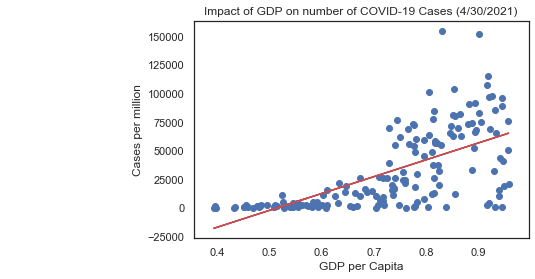

In [15]:
# Calculate the correlation value because why not
correlation = st.pearsonr(CovidAll["HDI"],CovidAll["Cases"])
print(f"The correlation between GDP per capita and cases per million is {round(correlation[0],2)}")

# Plot
x_values = CovidAll["HDI"]
y_values = CovidAll["Cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label
plt.xlabel('GDP per Capita')
plt.ylabel("Cases per million")
plt.title ("Impact of GDP on number of COVID-19 Cases (4/30/2021)")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.annotate(line_eq,(0,2),fontsize=10,color="red")

# Print
plt.savefig("Output/ScatterGDPvsCases.png")

#Display
plt.show()